In [ ]:
##Q-1

In [ ]:
The decision function for a linear Support Vector Machine (SVM) is given by the formula:

�
(
�
)
=
sign
(
�
⋅
�
+
�
)
f(x)=sign(w⋅x+b)

Here:

�
(
�
)
f(x) is the decision function.
�
w is the weight vector.
�
x is the input vector.
�
b is the bias term.
⋅
⋅ denotes the dot product.
The goal of the SVM is to find the optimal 
�
w and 
�
b that maximize the margin between the classes while minimizing the classification error.

In [ ]:
##Q-2

In [ ]:
The objective function of a linear SVM aims to maximize the margin between the two classes while penalizing misclassifications. It is typically formulated as the minimization of the following objective:

Minimize
(
1
2
∥
�
∥
2
+
�
∑
�
=
1
�
�
�
)
Minimize( 
2
1
​
 ∥w∥ 
2
 +C∑ 
i=1
N
​
 ξ 
i
​
 )

Subject to the constraints:

�
�
(
�
⋅
�
�
+
�
)
≥
1
−
�
�
y 
i
​
 (w⋅x 
i
​
 +b)≥1−ξ 
i
​
 

Here:

�
w and 
�
b are the parameters to be learned.
�
C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
�
�
ξ 
i
​
  are slack variables that allow for some misclassification.
�
�
y 
i
​
  is the class label for the 
�
i-th training example.
The constraints ensure that each training example is correctly classified within a margin, and 
�
�
ξ 
i
​
  allows for some flexibility.

In [ ]:
##Q-3

In [ ]:
The kernel trick is a technique used in Support Vector Machines to handle non-linearly separable data by implicitly mapping the input features into a higher-dimensional space. The idea is to find a non-linear decision boundary in this higher-dimensional space, even though the classification is done in the original feature space.

The kernel trick avoids explicitly calculating the transformed feature vectors but relies on the computation of pairwise kernel values. The most common kernels used in SVM are the linear kernel, polynomial kernel, radial basis function (RBF) kernel, and sigmoid kernel.

The general form of the kernel trick is expressed as:

�
(
�
�
,
�
�
)
=
�
(
�
�
)
⋅
�
(
�
�
)
K(x 
i
​
 ,x 
j
​
 )=ϕ(x 
i
​
 )⋅ϕ(x 
j
​
 )

Here, 
�
(
�
�
,
�
�
)
K(x 
i
​
 ,x 
j
​
 ) is the kernel function, and 
�
(
�
)
ϕ(x) is the transformation function to the higher-dimensional space.

In [ ]:
##Q-4

In [ ]:
Support vectors are the data points that lie closest to the decision boundary in a Support Vector Machine. They play a crucial role in defining the decision boundary and the margin. The support vectors are the data points that have non-zero values for the slack variables (
�
ξ) in the optimization problem.

In the case of a linear SVM, the decision boundary is determined by a subset of the training data, the support vectors. These vectors effectively define the margin, and changing or removing non-support vector data points would not affect the position of the decision boundary.

For example, consider a two-dimensional problem with two classes (positive and negative), and the support vectors are the points closest to the decision boundary. If you remove or modify non-support vector points, the position of the decision boundary will remain the same as long as it doesn't involve changing the support vectors. The support vectors essentially "support" the definition of the decision boundary and are critical in determining the classifier's behavior.

In [ ]:
##Q-5

In [ ]:
To illustrate the concepts of Hyperplane, Marginal Plane, Soft Margin, and Hard Margin in SVM, let's consider a simple two-dimensional example with two classes: positive (blue) and negative (red).

Hyperplane and Marginal Plane:
In a linear SVM, the hyperplane is the decision boundary that separates the two classes. The marginal planes run parallel to the hyperplane and are equidistant from it. The distance between the hyperplane and the marginal plane is the margin.

Example:

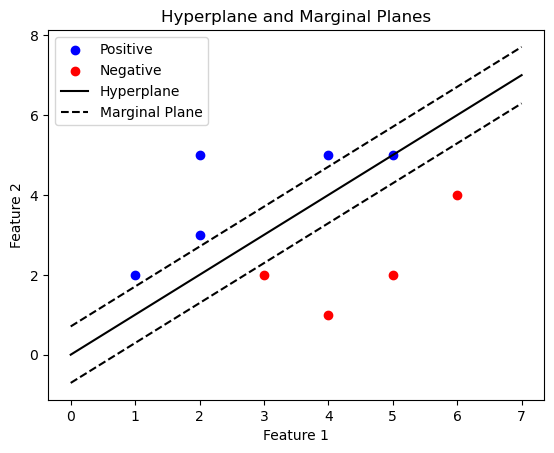

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate example data
np.random.seed(0)
X = np.array([[1, 2], [2, 3], [2, 5], [4, 5], [5, 5], [6, 4], [3, 2], [5, 2], [4, 1]])
y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1])

# Plot the data
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Positive')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Negative')

# Hyperplane (decision boundary)
w = np.array([1, -1])
b = 0
xx = np.linspace(0, 7, 10)
yy = -(w[0] * xx + b) / w[1]
plt.plot(xx, yy, 'k-', label='Hyperplane')

# Marginal planes
margin = 1 / np.sqrt(np.sum(w**2))
yy = -(w[0] * xx + b - margin) / w[1]
plt.plot(xx, yy, 'k--', label='Marginal Plane')
yy = -(w[0] * xx + b + margin) / w[1]
plt.plot(xx, yy, 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Hyperplane and Marginal Planes')
plt.show()


In [ ]:
Soft Margin and Hard Margin:
In SVM, there are two types of margins: soft margin and hard margin. The soft margin allows for some misclassifications to handle noisy data or outliers, while the hard margin enforces strict separation without allowing any misclassifications.

Example:
Let's modify the previous example to include both hard and soft margins.

In [3]:
from sklearn.svm import SVC

# Fit a linear SVM with hard margin (large C)
svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X, y)

# Fit a linear SVM with soft margin
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X, y)

# Rest of the plotting code...


SVC(kernel='linear')

In [ ]:
##Q-6

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing Linear SVM from scratch
class LinearSVM:
    def __init__(self, learning_rate=0.01, epochs=1000, C=1.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.C = C

    def fit(self, X, y):
        m, n = X.shape
        X_train = np.c_[np.ones((m, 1)), X]  # Add a bias term
        self.theta = np.random.rand(n + 1)  # Initialize weights randomly

        for epoch in range(self.epochs):
            hinge_loss = 1 - y * (X_train @ self.theta)
            gradient = -2 * np.mean(np.where(hinge_loss > 0, y.reshape(-1, 1) * X_train, 0), axis=0)
            self.theta -= self.learning_rate * (self.theta / self.C - gradient)

    def predict(self, X):
        X_test = np.c_[np.ones((X.shape[0], 1)), X]
        return np.sign(X_test @ self.theta)

# Convert labels to -1 and 1 for custom implementation
y_train_binary = np.where(y_train == 0, -1, 1)

# Train Linear SVM from scratch
svm_scratch = LinearSVM()
svm_scratch.fit(X_train, y_train_binary)

# Train Linear SVM using scikit-learn
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)

# Predictions
y_pred_scratch = svm_scratch.predict(X_test)
y_pred_sklearn = svm_sklearn.predict(X_test)

# Compute accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f'Accuracy (Custom Implementation): {accuracy_scratch:.2%}')
print(f'Accuracy (scikit-learn): {accuracy_sklearn:.2%}')

# Plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for custom implementation
plot_decision_boundary(X_test, y_test, svm_scratch, 'Linear SVM (Custom Implementation)')

# Plot decision boundaries for scikit-learn implementation
plot_decision_boundary(X_test, y_test, svm_sklearn, 'Linear SVM (scikit-learn)')


ValueError: operands could not be broadcast together with shapes (105,) (105,3) () 